GDP/GDP per capita and Life expectancy correletaions

I have 2 datasets 1 containing data about GDP & GDP per capita for countries.
And the other dataset containing Life expectancy for countries randing from the year 2000 to 2015

Method to compare:
1. Merge datasets on Country name and Year
2. Clean the data by removing NaN values for GDP per capita and Life expectancy
3. Calculate the mean of GDP per capita and Life expectancy for data we have left
4. visualise the result and draw concusion

In [62]:
import pandas as pd

df_gdp_percapita = pd.read_csv("world_country_gdp_usd.csv")

#df_gdp_percapita

In [63]:
df_life_expectancy = pd.read_csv("Life-Expectancy-Data-Updated.csv")

#df_life_expectancy

In [64]:
df_gdp_percapita = df_gdp_percapita.rename(columns={"Country Name": "Country", "year": "Year"})

#df_gdp_percapita

In [65]:
df_merged = pd.merge(df_gdp_percapita, df_life_expectancy, on=["Country", "Year"], how="left")
df_cleaned = df_merged.dropna(subset=["GDP_per_capita_USD", "Life_expectancy"])

#df_cleaned = df_cleaned[["Country", "Year", "GDP_per_capita_USD", "Life_expectancy"]]
#df_cleaned

In [66]:
grouped_df = df_cleaned.groupby(["Country"])[["GDP_per_capita_USD", "Life_expectancy"]].mean()

sorted_df = grouped_df.sort_values(by="Life_expectancy", ascending=False)

#sorted_df

C:\Users\matti\AppData\Local\Temp\ipykernel_16056\1521075005.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,


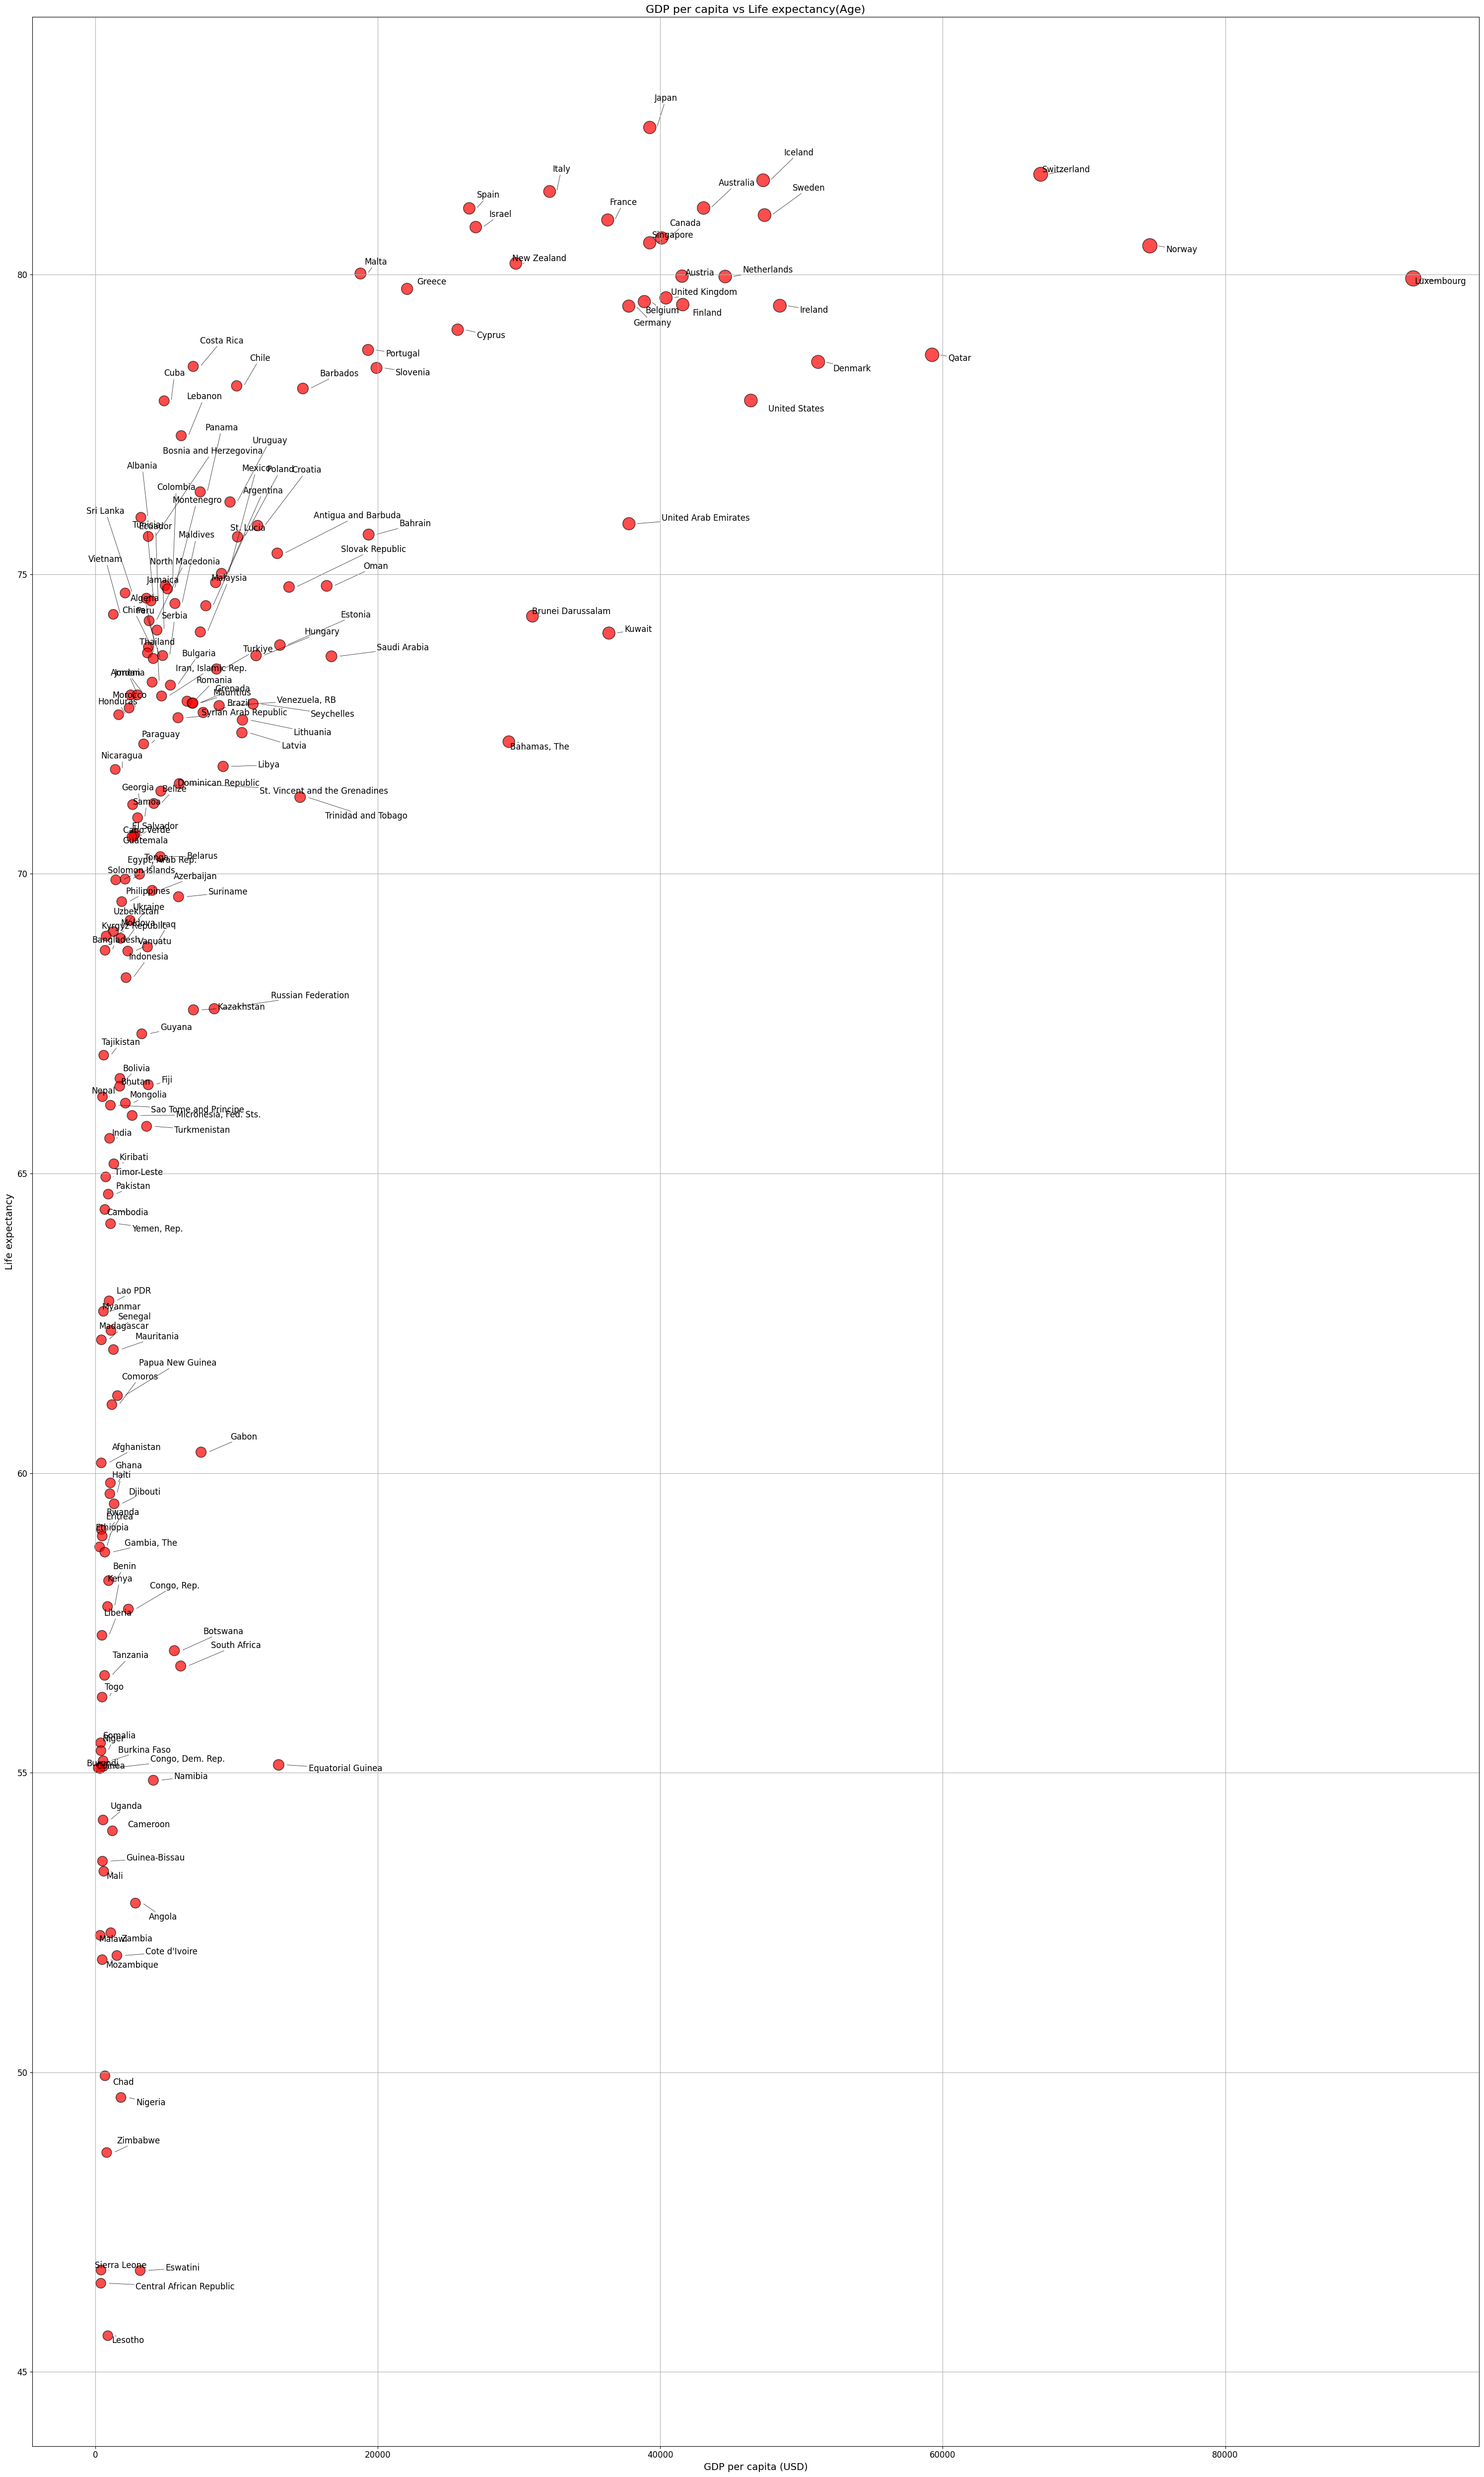

In [67]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scale the dot size based on GDP per capita
min_dot_size = 200
max_dot_size = 500
dot_size = min_dot_size + (max_dot_size - min_dot_size) * (sorted_df['GDP_per_capita_USD'] / sorted_df['GDP_per_capita_USD'].max())

# Plotting
plt.figure(figsize=(30, 50))  # Adjusted figure size

scatter = plt.scatter(sorted_df['GDP_per_capita_USD'], sorted_df['Life_expectancy'], s=dot_size, c='red', edgecolors="black", alpha=0.7)

texts = []
for i, country in enumerate(sorted_df.index):
    # Adjust label position
    texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,
                          fontsize=12, ha='left', va='center'))  # Adjusted label position

# Adjust label positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.title('GDP per capita vs Life expectancy(Age)', fontsize=16)
plt.xlabel('GDP per capita (USD)', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()

Conclusion:
From the data we had and the graph we plotted we can see that there seem to be a trend fo countries with higher GDP per capita having longer life expectancy since the majority of the countries with higher values seem to be on the upper end of the y-axis.
But we can also draw a conclusion that for the lower GDP per capita countries there does not seem to be a direct correlation with life expectancy.
There seem to be other factors that is effecting it as well.

In general for Countries on higher GDP per capita scale you could expect to have longer life expectency